In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split

In [2]:
import os
 
# assign directory
directory = 'modified_data//'

# iterate over files in
# that directory
df = pd.DataFrame()
for filename in os.scandir(directory):
    data = pd.read_csv(filename.path)
    label = data['label'][0]
    conv_arr= data.drop(['label'],axis = 1).values
    sample = []
    for i in conv_arr:
        for s in i:
            sample.append(s)
    d = pd.DataFrame(sample).T
    d['label'] = label
    df = df.append(d)


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,7159,7160,7161,7162,7163,7164,7165,7166,7167,label
0,1.351784,-0.899613,5.246766,-2.403434,-9.436008,3.435610,1.618176,2.683669,2.812536,-0.693032,...,3.435610,46.227864,2.683669,2.812536,-0.782772,3.671450,29.942859,22.862857,32.419226,Like
0,-12.632913,-16.313451,-12.221618,-6.455789,0.605188,-10.664013,-16.765032,-8.597538,-16.280974,0.033870,...,61.606893,62.399275,53.911099,80.321751,-0.017906,51.229110,22.431267,33.149213,22.946918,Dislike
0,9.189672,2.479313,5.653051,0.390283,-0.583270,-1.534376,-2.914035,-2.929112,-0.588647,0.452418,...,-17.792271,1.315478,13.813392,-9.810201,1.838895,-17.422764,-16.016687,-15.658793,2.241475,Dislike
0,12.373305,22.131391,11.972942,6.972561,-0.168487,17.637820,17.667610,16.417003,19.600048,0.466919,...,19.893621,27.737600,18.845073,23.681946,0.860744,0.078231,26.342068,-1.530301,-10.288481,Like
0,-10.801873,-19.877566,-10.656552,-8.644994,-0.327363,-17.081680,-14.927924,-16.045365,-21.343535,-2.482957,...,5.785922,9.370380,-0.283181,8.576759,-1.995045,26.463665,1.484374,3.371971,2.744337,Like
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-11.877727,-9.871815,-3.593950,-5.743519,-0.735920,4.120738,3.683155,0.869399,-1.564389,0.101524,...,-4.933200,13.731498,-3.219247,-0.965219,-0.002169,6.304295,8.483986,2.232769,-5.300577,Dislike
0,-13.512964,-8.306977,-10.112288,-14.247393,-0.012926,-18.369227,-12.501860,-12.297467,-18.567244,0.318912,...,-6.697379,-1.081848,-0.775741,-3.515691,-0.404814,2.070726,-0.001236,-1.899880,1.979674,Dislike
0,4.844972,-2.068149,14.017605,19.039186,0.550654,35.779930,29.102918,24.725635,30.804023,-0.250347,...,15.545471,8.364626,3.744885,9.744280,0.567998,2.901734,5.412565,15.535074,2.389460,Dislike
0,-19.218621,-20.805024,-17.052489,-26.549039,-1.252348,-30.661892,-36.104348,-28.771378,-28.179798,-0.370498,...,64.675903,120.581722,139.391569,78.507999,-2.273356,60.744284,35.586866,95.970966,20.230021,Dislike


In [4]:
eeg_data = df.drop(['label'] , axis = 1)
labels = df['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(eeg_data, labels ,  stratify=labels,     test_size=0.3)

#apply model

In [8]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)


In [9]:
acc=metrics.accuracy_score(y_test,y_pred)*100

In [10]:
acc

70.38216560509554

[[118  57]
 [ 36 103]]


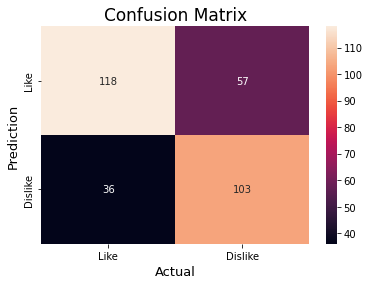

In [11]:
conf = cm(y_test, y_pred)
print(conf)
sns.heatmap(conf,
            annot=True,
            fmt='g',
            xticklabels=['Like','Dislike'],
            yticklabels=['Like','Dislike'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [12]:
list(y_test).count("Dislike")


175

In [13]:
list(y_test).count("Like")

139